In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# read csv file
df=pd.read_csv('archive/dataset_phishing_numeric.csv')

# show all columns 
pd.set_option('display.max_columns', None)

### Exploring the dataset

In [ ]:
# Print the number of rows and columns
print("Number of rows: ",df.shape[0]) 
print("Number of columns: ", df.shape[1])

In [ ]:
# printing the first 5 rows.
df.head()

In [ ]:
#getting info about columns
df.info()

In [ ]:
# Looking for null values
df.isna().sum().sort_values(ascending=False)

### Observation: The dataset has no missing values. All columns are numeric and either integers or float. Result: No cleaning of missing data needed and data types look correct.

### Looking for Duplicated Values

In [ ]:
# Identifying duplicate columns

duplicates = df.duplicated().sort_values(ascending=False)
print(duplicates)

In [ ]:
#Get duplicate rows.

duplicates = df.duplicated()
df[duplicates]
print("Number of duplicated rows: ", df[duplicates].shape[0])

In [ ]:
# printing duplicates values 

df[duplicates].to_excel(r'archive/duplicates.xlsx')

In [ ]:
#deleting all duplicated values

cleaned_data= df.drop_duplicates()

In [ ]:
# checking again if any duplicate values still exist.
check = cleaned_data.duplicated()
cleaned_data[check]

### Observation: The dataset contained 174 duplicated rows. All duplicates were removed from the source dataset. The new dataframe without duplicate values is called "cleaned_data".

### Exploring summary statistics:

In [ ]:
#Show statistics 

cleaned_data.describe()

### Observation: 
length_url, lenght_hostname, nb_dots, nb_hyphens, nb_and, nb_eq,nb_underscore,nb_percent, nb_slash, nb_semicolumn, nb_space, length_words_raw, char_repeat, shortest_words_raw, shortest_word_host, shortest_word_path,	longest_words_raw, longest_word_host, longest_word_path, avg_words_raw,	avg_word_host, avg_word_pat, phish_hints, np_hyperlinks, nb_extCSS, domain_registration_length, page_rank,have high max_values relative to the percentiles. 
domain_registration_length and domain_age have negative values.


### Exploratory Data Analysis

#### Analyzing length_url

In [ ]:
#Visualizing outliers with a Boxplot

URL_lenght = cleaned_data['length_url']
sns.boxplot(data=URL_lenght)
plt.show()

In [ ]:
#Visualizing distribution with a Violinplot

URL_lenght = cleaned_data['length_url']
sns.violinplot(data=URL_lenght)
plt.show()

In [ ]:
#Visualizing the distribution of length_url


sns.histplot(data=cleaned_data['length_url'],bins=20)
plt.title('Distribution of length_url')
plt.show()

In [ ]:
#Finding outliers

from scipy.stats import iqr
iqr = iqr(cleaned_data['length_url'])
lower = np.quantile(cleaned_data['length_url'], 0.25) - 1.5 * iqr
upper = np.quantile(cleaned_data['length_url'], 0.75) + 1.5 * iqr


print(lower)
print(upper)

#showing outliers (3 in total)
outliers= cleaned_data[((cleaned_data['length_url'] < lower)) | (cleaned_data['length_url'] > upper)]

outliers

In [ ]:
print('There are ', outliers.shape[0], 'outliers for length_url in the dataset')

#### Oberservation: Some URLs have a lenght over 1000.  The histogram shows that the vast majority of values are in the low end of length. Based on a statistical formula, all values above a length of 128 are considered outliers. Further discussion needed to keep them or not.

#### Analyzing length hostname:

In [ ]:
#Visualizing outliers with a Boxplot

hostname_lenght = cleaned_data['length_hostname']
sns.boxplot(data= hostname_lenght)
plt.show()

In [ ]:
#Visualizing the distribution of length_hostname


sns.histplot(data=cleaned_data['length_hostname'],bins=20)
plt.title('Distribution of length_hostname')
plt.show()

#### Analyzing  nb_dots:

In [ ]:
#Visualizing outliers with a Boxplot

hostname_lenght = cleaned_data['nb_dots']
sns.boxplot(data= hostname_lenght)
plt.show()

In [ ]:
#Visualizing the distribution of nb_dots

sns.histplot(data=cleaned_data['nb_dots'],bins=20)
plt.title('Distribution of nb_dots')
plt.show()

#### Analyzing longest_words_raw

In [ ]:
#Visualizing outliers with a Boxplot

hostname_lenght = cleaned_data['longest_words_raw']
sns.boxplot(data= hostname_lenght)
plt.show()

In [ ]:
#Visualizing the distribution of  longest_words_raw

sns.histplot(data=cleaned_data['longest_words_raw'],bins=20)
plt.title('Distribution of longest_words_raw')
plt.show()

#### Observation: As for length_url there are also some rows with outliers for longest_words_raw, nb_dots and length_hostname. Further clarification is needed.

In [ ]:
# Exporting example of outliers for url_length to Excel
# outliers.to_excel(r'outliers_url_length.xlsx')

In [ ]:
# Exporting cleaned data to Excel

# cleaned_data.to_csv(r'phishing_dataset_cleaned.csv')

In [ ]:
application_df = pd.read_csv("archive/dataset_phishing.csv")
application_df.head()

In [ ]:
# Re-run above code to run this cell
# Encoding 'status' as label 1 & 0, naming the field as target
application_df['status'] = application_df['status'].str.contains('legitimate').astype(int)
application_df

### The code above makes all values legitimate = 1, and phishing = 0

In [ ]:
application_df.to_csv("archive/dataset_phishing_functionapplied.csv",index=False,encoding='UTF-8')

### The following function below will separate only the status & URL on one csv file

In [ ]:
function_df = application_df[['url','status']]

In [ ]:
function_df.head()

In [ ]:
function_df.to_csv("archive/function.csv",index=False,encoding='UTF-8')

### Function comes next

In [ ]:
application_df.head()

In [ ]:
legitimate_list = list(application_df[application_df.status == 1].url) 

In [ ]:
phishing_list = list(application_df[application_df.status == 0].url) 

In [ ]:
pd.DataFrame({'Phishing':phishing_list, 'Legitimate':legitimate_list})

In [ ]:
# Function that makes all values that = 1 (legitimate) into one column and values = 0 (phishing) into another column
# Save first excel files as Phishing_URLS.csv
# Save second excel file as Legitimate_URLS.csv
application_df

# Random Forest Classifier

Random Forest classifier is a type of ensemble learning model combines multiple smaller models into a more robust and accurate model. Random Forest Models use a number of weak learner algorithms (such as decision trees) and combines their output to make a final classification decision. They are very similar to their neural networks counterparts. Random forest models are the most commonly used model because of their robustness and scalability. Both output and feature selection of random forest models are easy to interpret and they can easily handle outliers and nonlinear data.

Random forest algorithms are very beneficial because they:
- are robust against overfitting as all of those weak learners are trained on different pieces of the data
- can be used to rank the importance of input values in a natural way.
- can handle thousands of input variables without variable deletion.
- are robust to outliers and nonlinear data. 
- run efficiently using large datasets.

In [125]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report
import pandas as pd
import tensorflow as tf

# Import our input dataset
original_df = pd.read_csv('archive/dataset_phishing_functionapplied.csv')
original_df.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,1
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,0
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,0
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,1
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,1


In [38]:
original_df.columns

Index(['url', 'length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens',
       'nb_at', 'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore',
       'nb_tilde', 'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma',
       'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com',
       'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url',
       'ratio_digits_host', 'punycode', 'port', 'tld_in_path',
       'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains',
       'prefix_suffix', 'random_domain', 'shortening_service',
       'path_extension', 'nb_redirection', 'nb_external_redirection',
       'length_words_raw', 'char_repeat', 'shortest_words_raw',
       'shortest_word_host', 'shortest_word_path', 'longest_words_raw',
       'longest_word_host', 'longest_word_path', 'avg_words_raw',
       'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand',
       'brand_in_subdomain', 'brand_in_path', 'suspecious_tld',
       'statistical_report', 

In [39]:
# drop url column
original_df = original_df.drop(columns = ['url'])

In [40]:
original_df.dtypes.tolist()

[dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 d

In [41]:
# # Create a OneHotEncoder instance
# enc = OneHotEncoder(sparse=False)

# # Fit and transform the OneHotEncoder using the categorical variable list
# encode_df = pd.DataFrame(enc.fit_transform(original_df[urls]))

# # Add the encoded variable names to the DataFrame
# encode_df.columns = enc.get_feature_names_out(urls)
# encode_df.head()

In [42]:
# encode_df.shape

In [43]:
# # Merge one-hot encoded features and drop the originals
# original_df = original_df.merge(encode_df,left_index=True, right_index=True)
# original_df = original_df.drop(urls,1)
# original_df.head()

# only reserved for categorical - not needed anymore 

In [44]:
# check that all columns are numeric
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 88 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   length_url                  11430 non-null  int64  
 1   length_hostname             11430 non-null  int64  
 2   ip                          11430 non-null  int64  
 3   nb_dots                     11430 non-null  int64  
 4   nb_hyphens                  11430 non-null  int64  
 5   nb_at                       11430 non-null  int64  
 6   nb_qm                       11430 non-null  int64  
 7   nb_and                      11430 non-null  int64  
 8   nb_or                       11430 non-null  int64  
 9   nb_eq                       11430 non-null  int64  
 10  nb_underscore               11430 non-null  int64  
 11  nb_tilde                    11430 non-null  int64  
 12  nb_percent                  11430 non-null  int64  
 13  nb_slash                    114

In [45]:
# Separating & assigning features and target columns to X & y
y = original_df['status']
X = original_df.drop('status',axis=1)
X.shape, y.shape

((11430, 87), (11430,))

In [46]:
columns = X.columns
columns

Index(['length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens', 'nb_at',
       'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore', 'nb_tilde',
       'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma',
       'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com',
       'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url',
       'ratio_digits_host', 'punycode', 'port', 'tld_in_path',
       'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains',
       'prefix_suffix', 'random_domain', 'shortening_service',
       'path_extension', 'nb_redirection', 'nb_external_redirection',
       'length_words_raw', 'char_repeat', 'shortest_words_raw',
       'shortest_word_host', 'shortest_word_path', 'longest_words_raw',
       'longest_word_host', 'longest_word_path', 'avg_words_raw',
       'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand',
       'brand_in_subdomain', 'brand_in_path', 'suspecious_tld',
       'statistical_report', 'nb_hyp

In [47]:
X

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
0,37,19,0,3,0,0,0,0,0,0,...,0,0,1,0,45,-1,0,1,1,4
1,77,23,1,1,0,0,0,0,0,0,...,0,1,0,0,77,5767,0,0,1,2
2,126,50,1,4,1,0,1,2,0,3,...,0,1,0,0,14,4004,5828815,0,1,0
3,18,11,0,2,0,0,0,0,0,0,...,0,1,0,0,62,-1,107721,0,0,3
4,55,15,0,2,2,0,0,0,0,0,...,0,0,1,0,224,8175,8725,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,45,17,0,2,0,0,0,0,0,0,...,0,0,0,0,448,5396,3980,0,0,6
11426,84,18,0,5,0,1,1,0,0,1,...,0,1,0,0,211,6728,0,0,1,0
11427,105,16,1,2,6,0,1,0,0,1,...,0,0,0,0,2809,8515,8,0,1,10
11428,38,30,0,2,0,0,0,0,0,0,...,0,1,0,0,85,2836,2455493,0,0,4


In [48]:
y

0        1
1        0
2        0
3        1
4        1
        ..
11425    1
11426    0
11427    1
11428    1
11429    0
Name: status, Length: 11430, dtype: int64

In [49]:

## Shuffle the rows to prepare for splitting and training the test set

# Shuffling the rows in the dataset so that when splitting the train and test set are equally distributed
# original_df = original_df.sample(frac=1).reset_index(drop=True)
# original_df.head(10)

In [104]:
# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=35, stratify=y) # random_state was originally 42

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [105]:
# examine the result of StandardScaler
X_train_scaled

array([[ 0.09055685, -0.47220907, -0.42357599, ..., -0.14224373,
        -1.07338093,  1.10924393],
       [ 0.16134575, -0.47220907, -0.42357599, ..., -0.14224373,
         0.9316357 ,  2.68623024],
       [-0.65272655, -0.56354801, -0.42357599, ..., -0.14224373,
        -1.07338093, -0.46774238],
       ...,
       [ 0.1259513 ,  1.9026032 ,  2.36085146, ..., -0.14224373,
         0.9316357 , -1.25623554],
       [-0.36957097, -0.19819227, -0.42357599, ..., -0.14224373,
         0.9316357 , -1.25623554],
       [ 0.37371243, -0.28953121, -0.42357599, ..., -0.14224373,
        -1.07338093,  1.89773708]])

In [161]:
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=128, random_state=78)

# max_depth, min_samples_split, max_features

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test_scaled)
print(f" Random forest predictive accuracy: {accuracy_score(y_test,y_pred):.3f}")

 Random forest predictive accuracy: 0.964


In [162]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1378,   51],
       [  52, 1377]], dtype=int64)

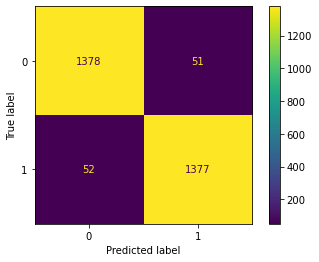

In [176]:
# Display confusion matrix
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
display.plot()
plt.savefig("archive/rfmodel_confusion_matrix_new.png")
plt.show()

### Confusion Matrix Analysis:

The real risk (downside) is when a legitimate url is labeled as phishing. That is the top right quadrant of the image above. This means it has created a false positive.

There is also opportunity loss when a phishing url is labeled as legitimate. That is the bottom left quadrant of the image above. This means it has created a false negative.

Top left quadrant (or the True Positive) are urls are that actually legitimate. Bottom right quadrant (or the True Negative) are urls that actually phishing.

In [164]:
# Our model predicted X% false positives and Y% false positive

In [165]:
# print a classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1429
           1       0.96      0.96      0.96      1429

    accuracy                           0.96      2858
   macro avg       0.96      0.96      0.96      2858
weighted avg       0.96      0.96      0.96      2858



In [166]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
# this is done using the classes within the Keras module
number_input_features = X_train.shape[1]
hidden_nodes_layer1 = (number_input_features * 3)
hidden_nodes_layer2 = (number_input_features * 1)
hidden_nodes_layer3 = (number_input_features * 0.50)

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(
        units=hidden_nodes_layer1, 
        input_dim=number_input_features, 
        activation="sigmoid")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(
    units=hidden_nodes_layer2, 
    activation="sigmoid")
)

# third hidden layer
nn.add(tf.keras.layers.Dense(
    units=hidden_nodes_layer3,
    activation="sigmoid"
))

# Output layer
nn.add(tf.keras.layers.Dense(
    units=1, 
    activation="sigmoid"
))

# Check the structure of the model
nn.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 261)               22968     
_________________________________________________________________
dense_40 (Dense)             (None, 87)                22794     
_________________________________________________________________
dense_41 (Dense)             (None, 43)                3784      
_________________________________________________________________
dense_42 (Dense)             (None, 1)                 44        
Total params: 49,590
Trainable params: 49,590
Non-trainable params: 0
_________________________________________________________________


In [167]:
# Chompile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [168]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=50)

Train on 8572 samples
Epoch 1/50
8572/8572 [==============================] - 1s 155us/sample - loss: 0.3447 - accuracy: 0.8529
Epoch 2/50
8572/8572 [==============================] - 1s 106us/sample - loss: 0.1631 - accuracy: 0.9410
Epoch 3/50
8572/8572 [==============================] - 1s 107us/sample - loss: 0.1540 - accuracy: 0.9459
Epoch 4/50
8572/8572 [==============================] - 1s 93us/sample - loss: 0.1490 - accuracy: 0.9472
Epoch 5/50
8572/8572 [==============================] - 1s 110us/sample - loss: 0.1459 - accuracy: 0.9475
Epoch 6/50
8572/8572 [==============================] - 1s 111us/sample - loss: 0.1427 - accuracy: 0.9488
Epoch 7/50
8572/8572 [==============================] - 1s 108us/sample - loss: 0.1399 - accuracy: 0.9486
Epoch 8/50
8572/8572 [==============================] - 1s 117us/sample - loss: 0.1371 - accuracy: 0.9498
Epoch 9/50
8572/8572 [==============================] - 1s 110us/sample - loss: 0.1353 - accuracy: 0.9500
Epoch 10/50
8572/8572 [==

In [169]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

2858/2858 - 0s - loss: 0.1964 - accuracy: 0.9528
Loss: 0.19639338032993245, Accuracy: 0.9527641534805298


<AxesSubplot:>

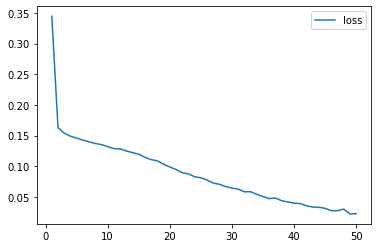

In [170]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

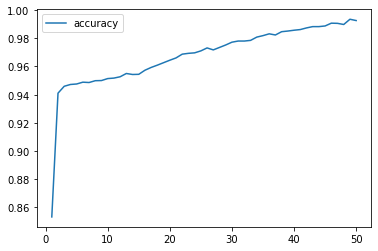

In [171]:
# Plot the accuracy
history_df.plot(y="accuracy")

## Model Assessment:

According to the accuracy metric of the neural network model was only able to correctly classify about 95.4%

Loss: 0.19639338032993245, Accuracy: 0.9527641534805298

## Use a Different Activation Function

It is important to use an activation function that matches the complexity of the input data. If we wanted to rank the four most-used activation functions by data complexity and ideal use case, the order would be as follows:

- The sigmoid function values are normalized to a probability between 0 and 1, which is ideal for binary classification (like our output classification)
- The tanh function can be used for classification or regression, and it expands the range between -1 and 1.
- The ReLU function is ideal for looking at positive nonlinear input data for classification or regression.
- The Leaky ReLU function is a good alternative for nonlinear input data with many negative inputs.

In [172]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
# this is done using the classes within the Keras module
number_input_features = X_train.shape[1]
hidden_nodes_layer1 =  50
hidden_nodes_layer2 = 25
hidden_nodes_layer3 = 30

nn_new = tf.keras.models.Sequential()

# First hidden layer
nn_new.add(
    tf.keras.layers.Dense(
        units=hidden_nodes_layer1, 
        input_dim=number_input_features, 
        activation="sigmoid")
)

# Second hidden layer
nn_new.add(tf.keras.layers.Dense(
    units=hidden_nodes_layer2, 
    activation="sigmoid")
)

# third hidden layer
nn_new.add(tf.keras.layers.Dense(
    units=hidden_nodes_layer3,
    activation="sigmoid"
))

# Output layer
nn_new.add(tf.keras.layers.Dense(
    units=1, 
    activation="sigmoid"
))

# Check the structure of the model
nn_new.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 50)                4400      
_________________________________________________________________
dense_44 (Dense)             (None, 25)                1275      
_________________________________________________________________
dense_45 (Dense)             (None, 30)                780       
_________________________________________________________________
dense_46 (Dense)             (None, 1)                 31        
Total params: 6,486
Trainable params: 6,486
Non-trainable params: 0
_________________________________________________________________


In [173]:
# Compile the Sequential model together and customize metrics
nn_new.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model_new = nn_new.fit(X_train_scaled, y_train, epochs=50)

# Evaluate the model using the test data
model_loss, model_accuracy = nn_new.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Train on 8572 samples
Epoch 1/50
8572/8572 [==============================] - 1s 141us/sample - loss: 0.3984 - accuracy: 0.8546
Epoch 2/50
8572/8572 [==============================] - 1s 98us/sample - loss: 0.1651 - accuracy: 0.9406
Epoch 3/50
8572/8572 [==============================] - 1s 83us/sample - loss: 0.1504 - accuracy: 0.9452
Epoch 4/50
8572/8572 [==============================] - 1s 95us/sample - loss: 0.1468 - accuracy: 0.9490
Epoch 5/50
8572/8572 [==============================] - 1s 66us/sample - loss: 0.1424 - accuracy: 0.9494
Epoch 6/50
8572/8572 [==============================] - 1s 90us/sample - loss: 0.1415 - accuracy: 0.9486
Epoch 7/50
8572/8572 [==============================] - 1s 98us/sample - loss: 0.1383 - accuracy: 0.9504
Epoch 8/50
8572/8572 [==============================] - 1s 91us/sample - loss: 0.1368 - accuracy: 0.9514
Epoch 9/50
8572/8572 [==============================] - 1s 102us/sample - loss: 0.1339 - accuracy: 0.9521
Epoch 10/50
8572/8572 [========

<AxesSubplot:>

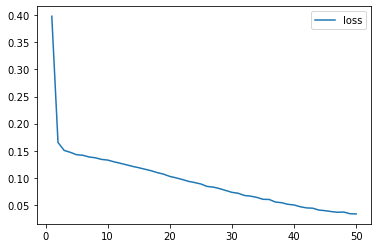

In [174]:
# Create a DataFrame containing training history
history_new_df = pd.DataFrame(fit_model_new.history, index=range(1,len(fit_model_new.history["loss"])+1))

# Plot the loss
history_new_df.plot(y="loss")

<AxesSubplot:>

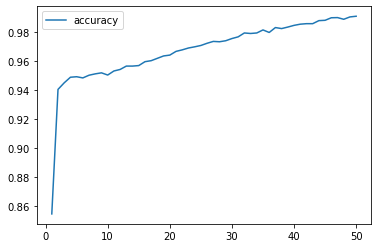

In [175]:
# Plot the accuracy
history_new_df.plot(y="accuracy")

## Model Assessment:

According to the accuracy metric of the neural network model was only able to correctly classify about 95.56% (slight improvement)

Loss: 0.15357043353177247, Accuracy: 0.9569628834724426